# Trees segmentation

This notebook shows how to generate object masks from text prompts with the Segment Anything Model (SAM). 

Working with Python 3.11.5 Environment. VS Code as Python IDE.

Reference: https://samgeo.gishub.org/examples/text_prompts/#segment-the-image

In [ ]:
# %pip install segment-geospatial groundingdino-py leafmap localtileserver gdal

In [70]:
import leafmap
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM

In [71]:
# longitude images
latitude = -36.8900857
longitude = 174.7591024

# Create map
def create_map(latitude, longitude):
    m = leafmap.Map(center=[latitude, longitude], zoom=19, height="800px")
    m.add_basemap("SATELLITE")
    return m

In [72]:

def generate_image(m, output_name):
    # get box bounds
    coordinates = m.bounds
    current_bbox = [coordinates[0][1], coordinates[0][0], coordinates[1][1], coordinates[1][0]]
    bbox = current_bbox

    # Download image
    image = "Image.tif"
    tms_to_geotiff(output=image, bbox=bbox, zoom=19, source="Satellite", overwrite=True)

    # Using SAM
    sam = LangSAM()
    text_prompt = "tree"
    sam.predict(image, text_prompt, box_threshold=0.24, text_threshold=0.24)

    # Vegetation Segmented output
    sam.show_anns(
        cmap='Greens',
        add_boxes=False,
        alpha=0.5,
        # title='Vegetation segmented without boxes',
        output=output_name
    )  


In [78]:
# Render maps
m_one = create_map(latitude, longitude)
m_one


Map(center=[-36.8900857, 174.7611024], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_tit…

In [79]:
longitude = longitude + 0.002

m_two = create_map(latitude, longitude)
m_two

Map(center=[-36.8900857, 174.7631024], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_tit…

Downloaded image 01/32
Downloaded image 02/32
Downloaded image 03/32
Downloaded image 04/32
Downloaded image 05/32
Downloaded image 06/32
Downloaded image 07/32
Downloaded image 08/32
Downloaded image 09/32
Downloaded image 10/32
Downloaded image 11/32
Downloaded image 12/32
Downloaded image 13/32
Downloaded image 14/32
Downloaded image 15/32
Downloaded image 16/32
Downloaded image 17/32
Downloaded image 18/32
Downloaded image 19/32
Downloaded image 20/32
Downloaded image 21/32
Downloaded image 22/32
Downloaded image 23/32
Downloaded image 24/32
Downloaded image 25/32
Downloaded image 26/32
Downloaded image 27/32
Downloaded image 28/32
Downloaded image 29/32
Downloaded image 30/32
Downloaded image 31/32
Downloaded image 32/32
Saving GeoTIFF. Please wait...
Image saved to Image.tif
final text_encoder_type: bert-base-uncased


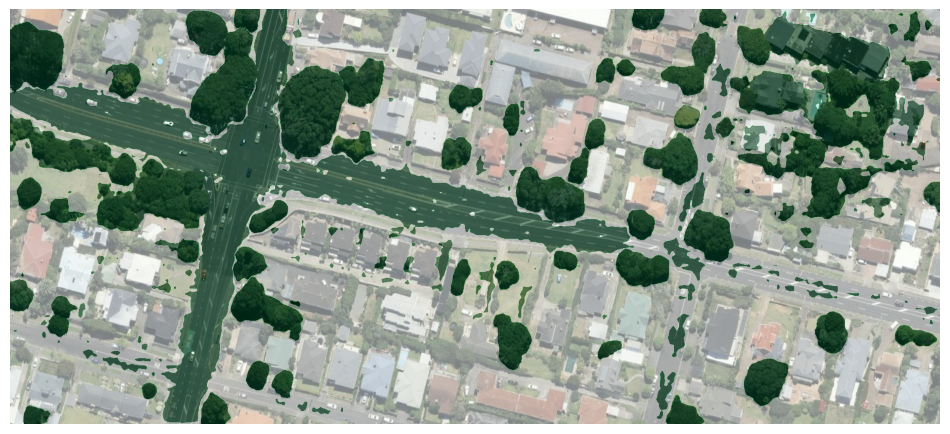

In [80]:
generate_image(m_one, "1")

Downloaded image 01/32
Downloaded image 02/32
Downloaded image 03/32
Downloaded image 04/32
Downloaded image 05/32
Downloaded image 06/32
Downloaded image 07/32
Downloaded image 08/32
Downloaded image 09/32
Downloaded image 10/32
Downloaded image 11/32
Downloaded image 12/32
Downloaded image 13/32
Downloaded image 14/32
Downloaded image 15/32
Downloaded image 16/32
Downloaded image 17/32
Downloaded image 18/32
Downloaded image 19/32
Downloaded image 20/32
Downloaded image 21/32
Downloaded image 22/32
Downloaded image 23/32
Downloaded image 24/32
Downloaded image 25/32
Downloaded image 26/32
Downloaded image 27/32
Downloaded image 28/32
Downloaded image 29/32
Downloaded image 30/32
Downloaded image 31/32
Downloaded image 32/32
Saving GeoTIFF. Please wait...
Image saved to Image.tif
final text_encoder_type: bert-base-uncased


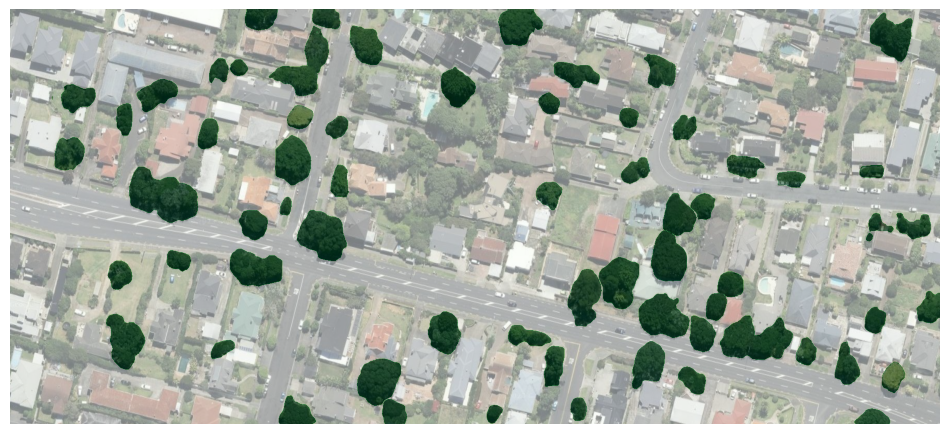

In [81]:
generate_image(m_two, "2")